Dataset successfully loaded.

Dataset Columns: Index(['dates', 'stationid', 'sumax', 'sumay', 'sumaz', 'countwx', 'countwy',
       'countwz', 'accx', 'accy', 'accz', 'velx', 'vely', 'velz', 'dispx',
       'dispy', 'dispz', 'temperature', 'humidity', 'pressure', 'rain',
       'lightavg', 'lightavgw/o0', 'lightmax', 'forces', 'moisture'],
      dtype='object')

Checking for missing values:
dates           20
stationid       20
sumax           20
sumay           20
sumaz           20
countwx         20
countwy         20
countwz         20
accx             0
accy             0
accz             0
velx            10
vely            10
velz            10
dispx           10
dispy           10
dispz           10
temperature     20
humidity        20
pressure        20
rain            20
lightavg        20
lightavgw/o0    20
lightmax        20
forces          20
moisture        20
dtype: int64

Dropped missing values and removed non-numeric columns.



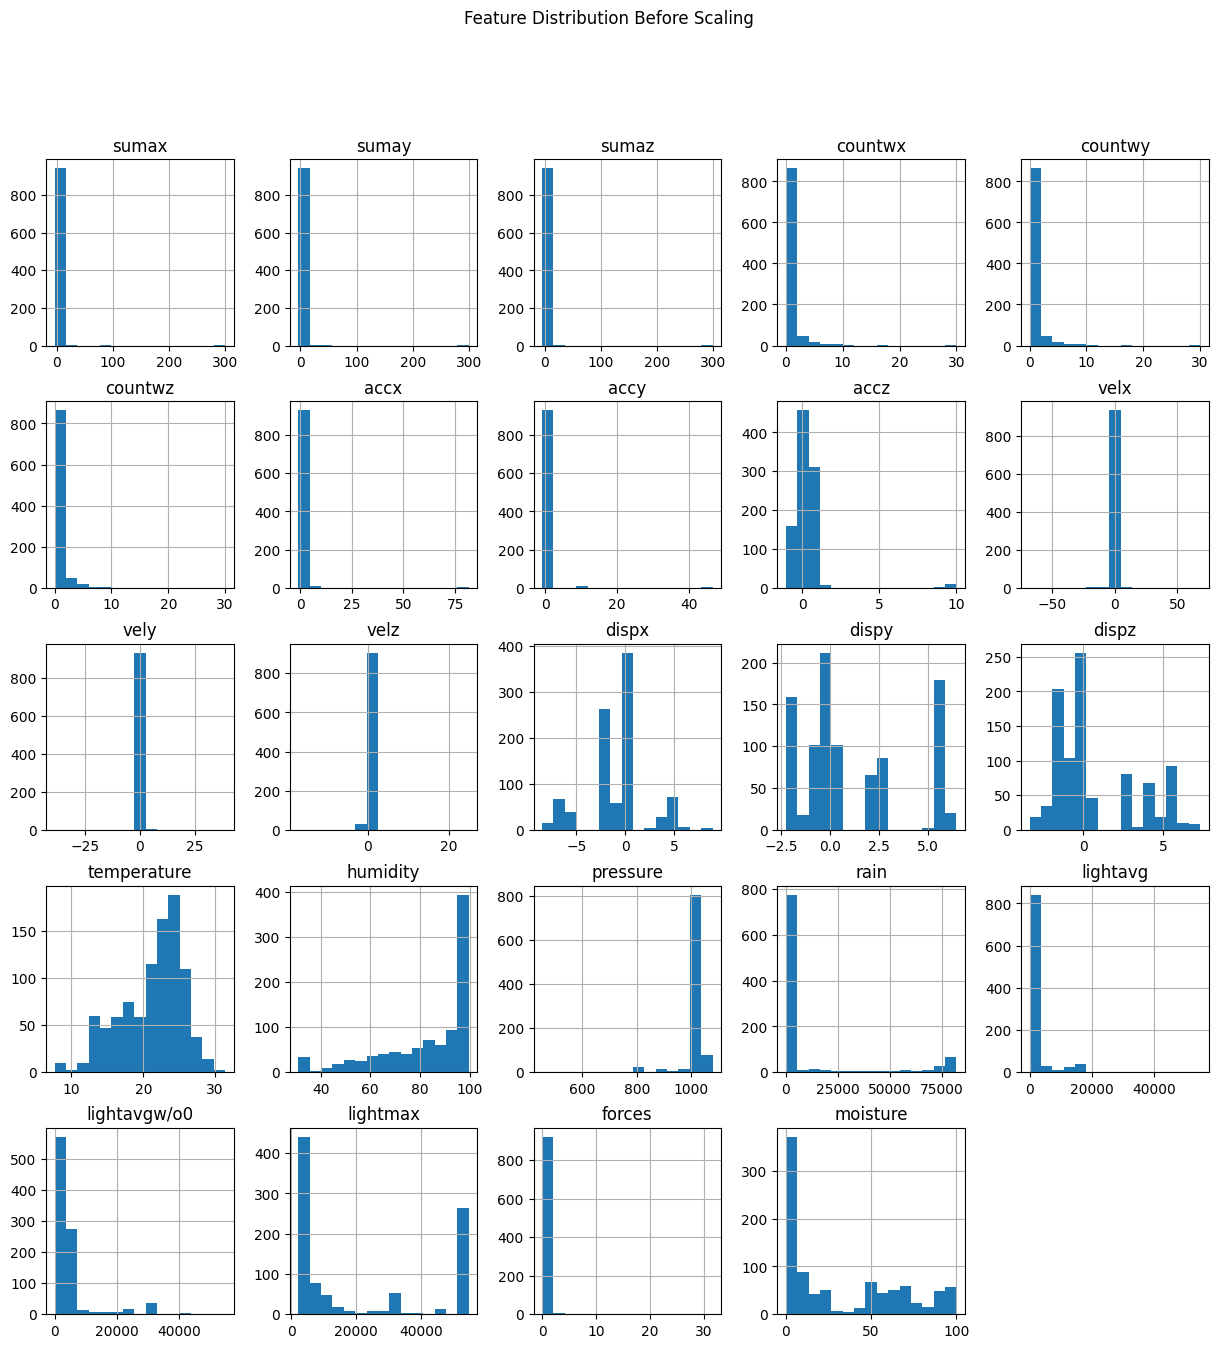

Data preparation complete.


In [10]:
# Part 1: Data Preparation and Preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('datalandslide.csv')
print("Dataset successfully loaded.\n")

# Display basic information
print("Dataset Columns:", data.columns)
print("\nChecking for missing values:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()
data = data.drop(columns=['dates', 'stationid'])
print("\nDropped missing values and removed non-numeric columns.\n")

# Visualize the distribution of each feature before scaling
data.hist(bins=15, figsize=(15, 15))
plt.suptitle("Feature Distribution Before Scaling")
plt.show()

# Define features (X) and target (y)
X = data.drop(columns=['moisture'])
y = data['moisture']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preparation complete.")


Model training complete.


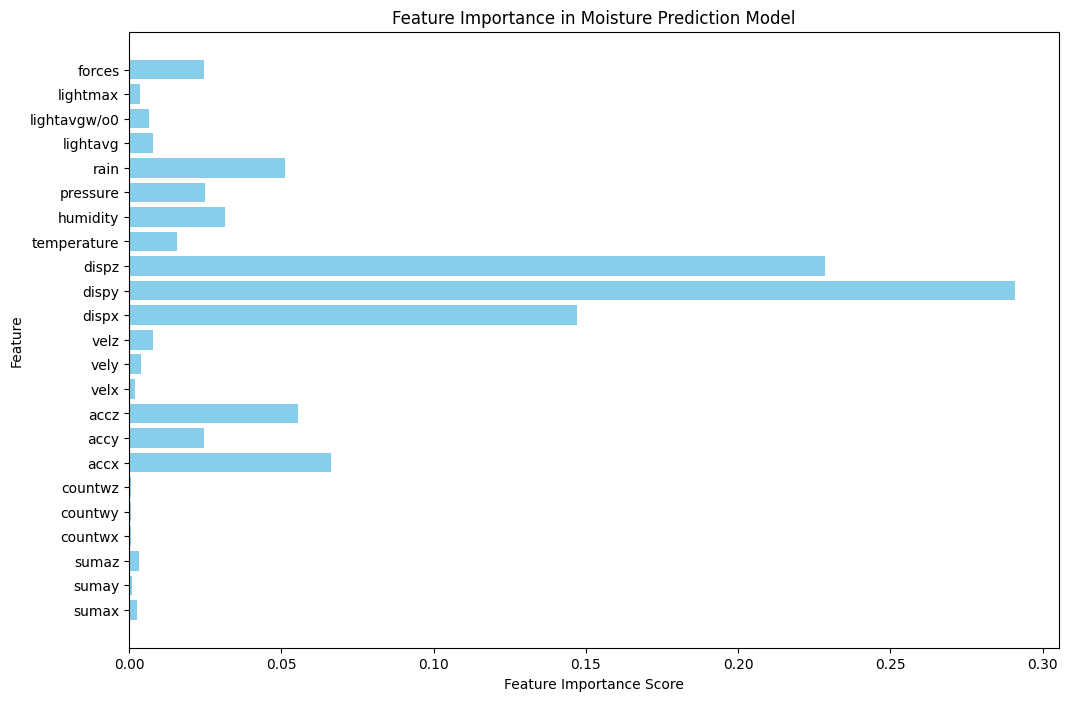

In [11]:
# Part 2: Model Building, Training, and Feature Importance

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

# Calculate and plot feature importance
feature_importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Moisture Prediction Model")
plt.show()


Mean Squared Error (MSE): 169.5483
Mean Absolute Error (MAE): 5.6648
R^2 Score: 0.8305


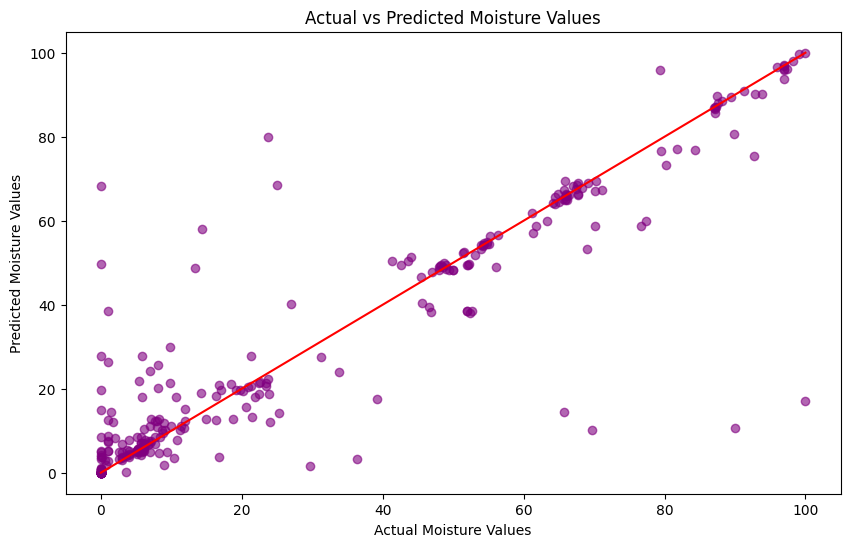

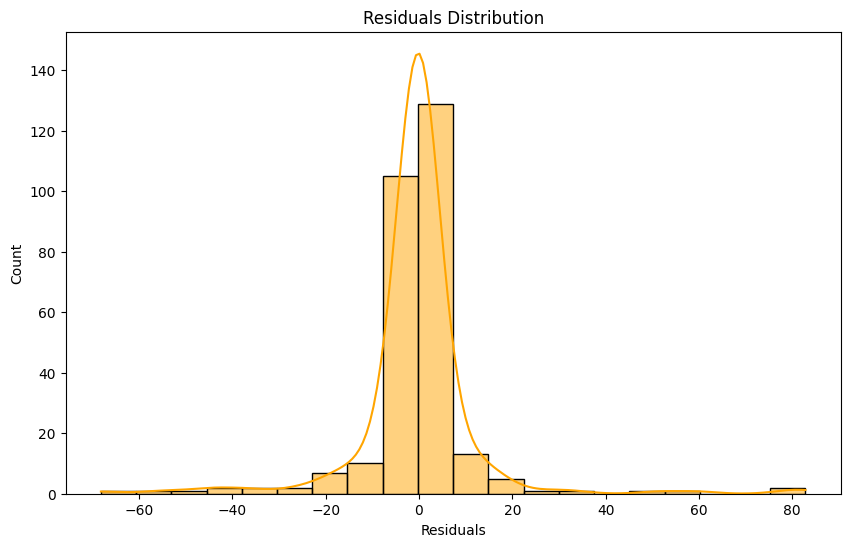

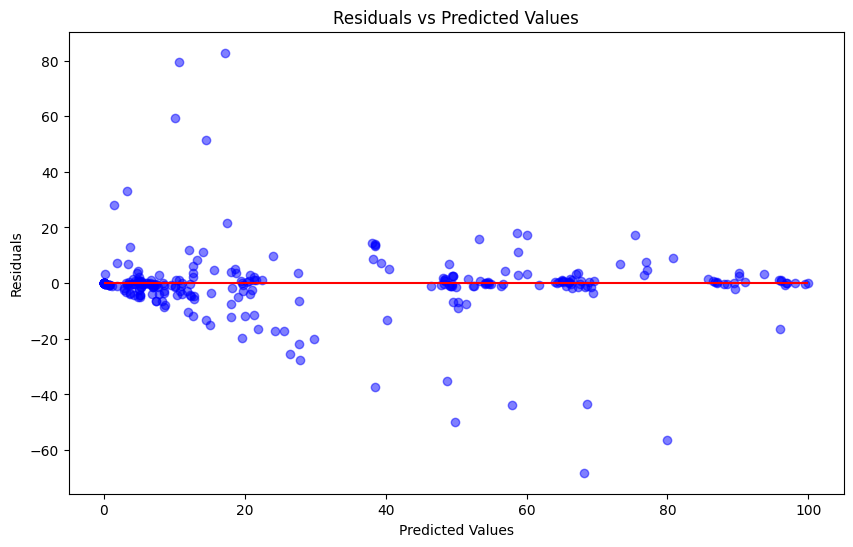

In [12]:
# Part 3: Model Evaluation, Predictions, and Extended Visualizations

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="purple", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Moisture Values")
plt.ylabel("Predicted Moisture Values")
plt.title("Actual vs Predicted Moisture Values")
plt.show()

# Plot residuals to check the distribution of prediction errors
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

# Residuals scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors="red")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [13]:
# Part 4: Predictions on New Data (Simulated)

import numpy as np

# Simulate new data samples (replace with actual data if available)
# Assuming each new sample has the same feature columns as X
new_data = pd.DataFrame({
    'sumax': [5.1, 2.3],
    'sumay': [3.5, 4.6],
    'sumaz': [1.5, 6.2],
    'countwx': [0.5, 1.8],
    'countwy': [0.3, 0.9],
    'countwz': [0.8, 1.1],
    'accx': [0.6, 1.4],
    'accy': [1.3, 2.0],
    'accz': [1.1, 2.3],
    'velx': [0.9, 1.2],
    'vely': [1.2, 1.9],
    'velz': [0.8, 1.5],
    'dispx': [2.0, 1.1],
    'dispy': [1.8, 2.2],
    'dispz': [0.5, 1.7],
    'temperature': [24, 30],
    'humidity': [85, 78],
    'pressure': [1012, 1015],
    'rain': [0.1, 0.3],
    'lightavg': [500, 600],
    'lightavgw/o0': [450, 580],
    'lightmax': [600, 750],
    'forces': [0.8, 1.1]
})

# Scale the new data
scaled_new_data = scaler.transform(new_data)

# Predict moisture levels for the new samples
new_predictions = model.predict(scaled_new_data)
print("Predicted Moisture Levels for New Data Samples:", new_predictions)


Predicted Moisture Levels for New Data Samples: [42.159126 48.624368]
